In [8]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import scipy

import warnings
warnings.filterwarnings("ignore")

In [25]:
def RMSE(y_fit, y):
    return np.sum((y_fit-y)**2)**0.5

def Bias(y_fit, y):
    return np.sum((y_fit-y)**2)

# 1DGP

# 1.1 data

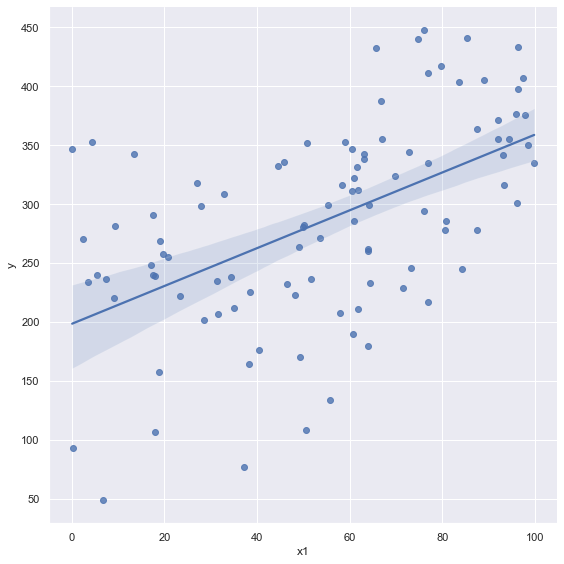

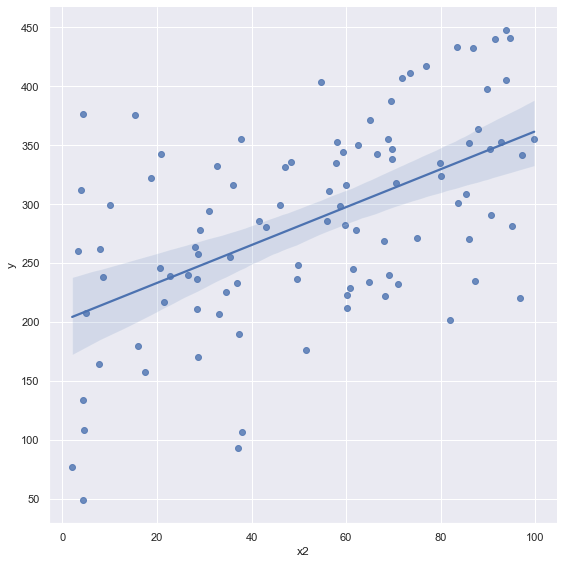

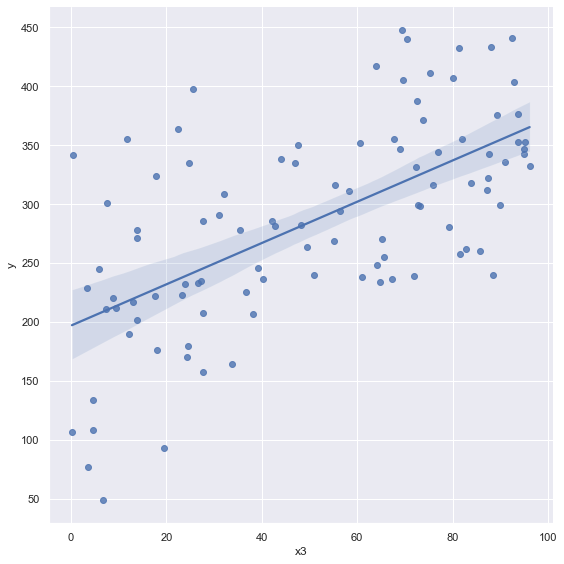

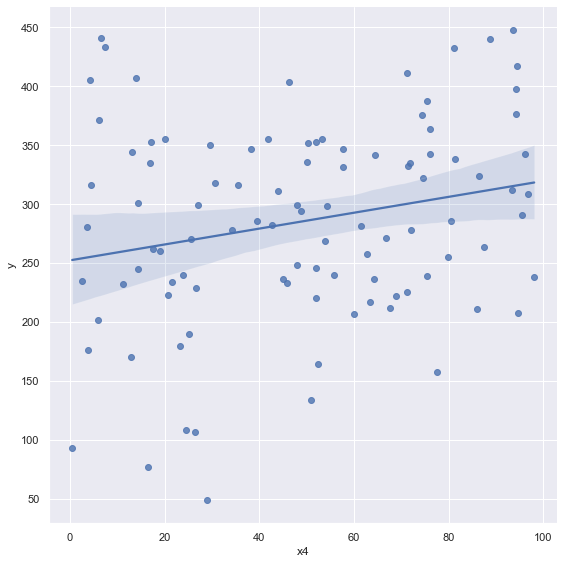

In [26]:
data = pd.DataFrame(np.random.uniform(0,100,[100,4]),columns=['x1','x2','x3','x4'])
data.reset_index(drop=True, inplace=True)

def classical(data):
    for i in range(0,100):
        data = data.copy()
        data["y"]  = 1.5 * data["x1"]+1.6 * data["x2"] + 1.7 * data["x3"] + + 0.7 * data["x4"]
    return data


data = classical(data)

sns.lmplot('x1','y',data=data ,size=8)

sns.lmplot('x2','y',data=data ,size=8)

sns.lmplot('x3','y',data=data ,size=8)

sns.lmplot('x4','y',data=data ,size=8)

In [27]:
for N in [100, 1000]:
    data = pd.DataFrame(np.random.uniform(0,N,[N,4]),columns=['x1','x2','x3','z'])
    data.reset_index(drop=True, inplace=True)

    for i in range(100):
        if i % 2 == 0:
            data['z'][i] = 0
        else:
            data['z'][i] = 1

    def classical(data):
        for i in range(0,100):
            data = data.copy()
            data.loc[i,"residual"] = np.random.normal(loc = 0, scale= 10 )
            data["y"]  = 1.5 * data["x1"]+1.6 * data["x2"] + 1.7 * data["x3"] + + 0.7 * data["z"] + data["residual"]
        return data

    data = classical(data)
    est = smf.ols('y ~ x1 + x2 + x3 + z ',data = data).fit()
    print('without covariates:N={},RMSE={},bias={}'.format(N,rmse,bias))


    data['z'] = data['y'] - data['x1']
    est = smf.ols('y ~ x1 + x2 + x3 + z ',data = data).fit()
    print('with covariates:N={},RMSE={},bias={}'.format(N,rmse,bias))

without covariates:N=100,RMSE=21972.903877030254,bias=482808504.78921115
with covariates:N=100,RMSE=21972.903877030254,bias=482808504.78921115
without covariates:N=1000,RMSE=21972.903877030254,bias=482808504.78921115
with covariates:N=1000,RMSE=21972.903877030254,bias=482808504.78921115


# 2 DGP with confounder

# 2.1 example

Confounding variables are a concept based on causality and cannot be derived solely from correlational 
analysis of statistical data. Correlation is an undirected relationship, while causality is directional. 
For example, there are three variables X, Y, Z. If Z affects X and Z affects Y, then Z is a confounding variable. 
The correlation between X and Y may come in part from their mutual dependence on Z.
For example X = medication, Y = recovery, Z = age, gender, etc. 
The incidence and recovery rates of certain diseases are related to age and gender. 
To test whether the drug is effective, these factors must be considered, and it is best to conduct group experiments

# 2.2 Generate

In [30]:
for N in [100, 1000]:
    data = pd.DataFrame(np.random.uniform(0,N,[N,4]),columns=['x1','x2','x3','z'])
    data.reset_index(drop=True, inplace=True)

    def classical(data):
        for i in range(0,100):
            data = data.copy()
            data["y"]  = 1.5 * data["x1"]+1.6 * data["x2"] + 1.7 * data["x3"] + 0.7 * data["z"]
        return data


    data = classical(data)

    data['y_new'] = data['y'] - 0.1*data["z"]
    data['x1_new'] = data['x1'] - 0.1*data["z"]

    est = smf.ols('y_new ~ x1_new',data = data).fit()
    rmse = RMSE(est.fittedvalues, data['y_new'])
    bias = Bias(est.fittedvalues, data['y_new'])
    print('without confounder :N={},RMSE={},bias={}'.format(N,rmse,bias))
    
    est = smf.ols('y_new ~ x1_new+z',data = data).fit()
    rmse = RMSE(est.fittedvalues, data['y'])
    bias = Bias(est.fittedvalues, data['y'])
    print('with confounder :N={},RMSE={},bias={}'.format(N,rmse,bias))

without confounder :N=100,RMSE=767.6381779105285,bias=574595.818169448
with confounder :N=100,RMSE=730.5836073778959,bias=533752.4073692996
without confounder :N=1000,RMSE=23151.04694370896,bias=518548078.87424195
with confounder :N=1000,RMSE=21461.6281779043,bias=460601484.0466158


# 3 DGP with bias

## 3.1 example

Sales forecasting is the starting point of financial forecasting. In many cases, we need to determine sales revenue first, then determine sales costs and expenses, and then estimate the operating assets that need to be increased, and the operating replication that will be generated at the same time, or additional long-term capital investment, etc. . The key factors involved in forecasting sales are many and vary from company to company. For example, large-scale manufacturing companies can forecast their revenue in the next few years based on the orders they are fulfilling and newly signed. Internet companies in the growth stage can make predictions based on the historical data of the company's revenue growth and the growth of the industry. This article will tell you about it. How to use historical data to forecast revenue.

## 3.2 data

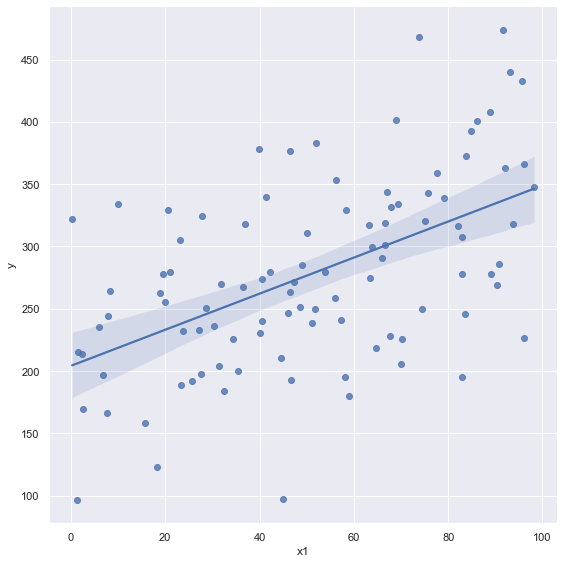

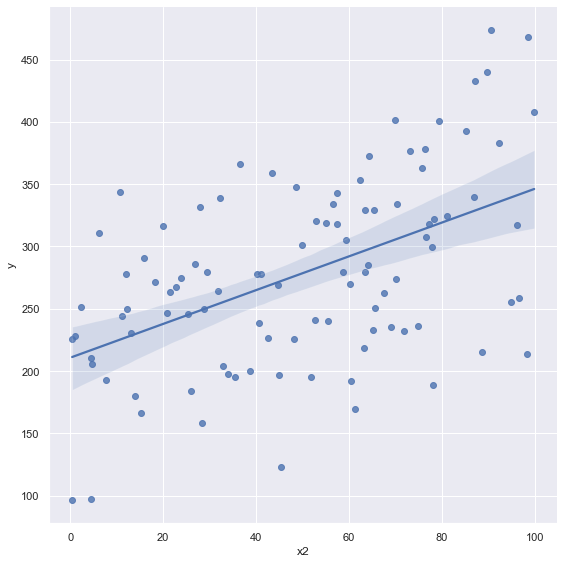

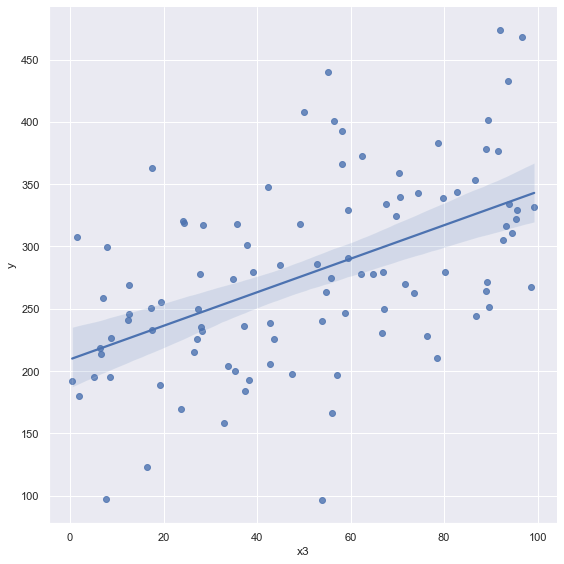

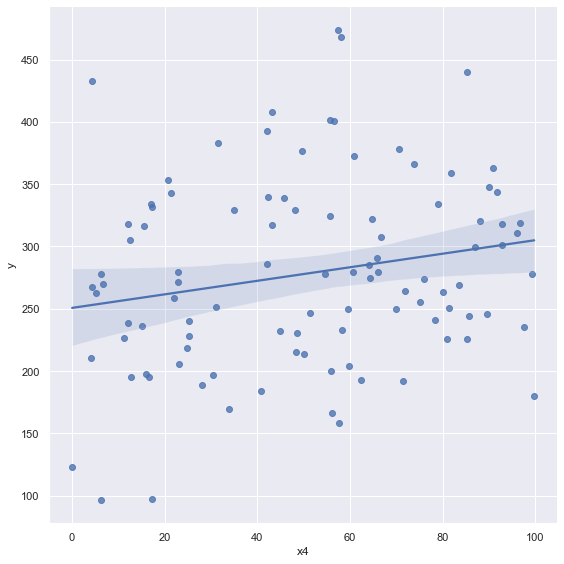

In [22]:
data = pd.DataFrame(np.random.uniform(0,100,[100,4]),columns=['x1','x2','x3','x4'])
data.reset_index(drop=True, inplace=True)

def classical(data):
    for i in range(0,100):
        data = data.copy()
        data.loc[i,"residual"] = np.random.normal(loc = 0, scale= 10 )
        data["y"]  = 1.5 * data["x1"]+1.6 * data["x2"] + 1.7 * data["x3"] + + 0.7 * data["x4"] + data["residual"]
    return data


data = classical(data)

sns.lmplot('x1','y',data=data ,size=8)

sns.lmplot('x2','y',data=data ,size=8)

sns.lmplot('x3','y',data=data ,size=8)

sns.lmplot('x4','y',data=data ,size=8)

# 3.3 test

In [18]:
for N in [100, 1000]:
    data = pd.DataFrame(np.random.uniform(0,N,[N,4]),columns=['x1','x2','x3','x4'])
    data.reset_index(drop=True, inplace=True)

    def classical(data):
        for i in range(0,100):
            data = data.copy()
            data["y"]  = 1.5 * data["x1"]+1.6 * data["x2"] + 1.7 * data["x3"] + 0.7 * data["x4"]
        return data


    data = classical(data)

    est = smf.ols('y ~ x1 + x2 + x3 + x4',data = data).fit()
    rmse = RMSE(est.fittedvalues, data['y'])
    bias = Bias(est.fittedvalues, data['y'])
    print('N={},RMSE={},bias={}'.format(N,rmse,bias))

N=100,RMSE=3.0342088396297255e-12,bias=9.206423282487164e-24
N=1000,RMSE=6.034565455175169e-11,bias=3.641598023279349e-21


# 4 DGP with overrepresentation

## 4.1 example

89 cases of motor neuron disease (MND) were identified in V&auml;rmland County during the period 1970&ndash;1981. This amounts to an annual incidence rate of 2.6 per 100,000 population, sex- and age-adjusted to the USA population, 1.7. The average point prevalence was 8.5 per 100,000 population and the median duration of MND was 25 months. 95&#x0025; of the MND cases in V&auml;rmland County were coded MND on their death certificates. MND was overrepresentated in persons performing heavy manual labor. A significantly higher mortality rate of MND in V&auml;rmland County was found compared to all Sweden (p < 0.01). One explanation for this can be that more people in this county perform heavy manual labor.

## 4.2 simulate

In [31]:
for N in [100, 1000]:
    data = pd.DataFrame(np.random.uniform(0,N,[N,4]),columns=['x1','x2','x3','z'])
    data.reset_index(drop=True, inplace=True)

    for i in range(100):
        if i % 2 == 0:
            data['z'][i] = 0
        else:
            data['z'][i] = 1

    def classical(data):
        for i in range(0,100):
            data = data.copy()
            data.loc[i,"residual"] = np.random.normal(loc = 0, scale= 10 )
            data["y"]  = 1.5 * data["x1"]+1.6 * data["x2"] + 1.7 * data["x3"] + + 0.7 * data["z"] + data["residual"]
        return data

    data = classical(data)
    est = smf.ols('y ~ x1 + x2 + x3 + z ',data = data).fit()
    print('with out COP:N={},RMSE={},bias={}'.format(N,rmse,bias))


    data2 = data[data['z']==1]
    est = smf.ols('y ~ x1 + x2 + x3 + z ',data = data2).fit()
    print('with COP:N={},RMSE={},bias={}'.format(N,rmse,bias))

with out COP:N=100,RMSE=21461.6281779043,bias=460601484.0466158
with COP:N=100,RMSE=21461.6281779043,bias=460601484.0466158
with out COP:N=1000,RMSE=21461.6281779043,bias=460601484.0466158
with COP:N=1000,RMSE=21461.6281779043,bias=460601484.0466158
